In [1]:
from pprint import pprint
from time import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
#Import file csv

df = pd.read_csv("Data_FinalProject.csv") 

In [3]:
df

,tanggal,id,nama,usia,jenis_kelamin,negara,state,kota,traffic_source,longitude,latitude,category,brand,departement,harga_produksi,harga_retail
0,2021-01-01 00:02:00,25478,Jennifer,16,F,United States,Maryland,Saint Charles,Email,-76.895511,38.582064,Tops & Tees,Allegra K,Women,4.140560,7.090000
1,2021-01-01 00:18:00,12645,Matthew,34,M,United States,Alabama,Homewood,Email,-86.811561,33.465175,Intimates,Calvin Klein,Women,6.204000,12.000000
2,2021-01-01 00:20:00,3795,Keith,18,M,United Kingdom,England,Peterborough,Organic,-0.204855,52.648573,Suits & Sport Coats,7 For All Mankind,Men,151.240000,398.000000
3,2021-01-01 00:20:00,60640,Jennifer,24,F,China,Hunan,Tianshui,Search,113.137343,29.310322,Sleep & Lounge,Vanity Fair,Women,19.516000,34.000000
4,2021-01-01 00:32:00,24613,Justin,49,M,Brasil,Paraná,Curitiba,Search,-49.331363,-25.503070,Sleep & Lounge,COOL-JAMS WICKING SLEEPWEAR,Women,30.940000,52.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42859,2022-06-01 19:10:53.959867,88540,Alexis,64,F,China,Hebei,Beijing,Search,115.479545,38.809573,Swim,Inches Off,Women,11.186270,29.990000
42860,2022-06-01 19:10:54.169111,97023,Tyler,30,M,Germany,Bayern,Fürth,Search,10.965082,49.485630,Jeans,Silver Jeans,Men,32.295449,58.189999
42861,2022-06-01 19:13:43.280184,90809,Kelly,57,F,Brasil,Paraná,Prudentópolis,Email,-51.104159,-25.125467,Suits & Sport Coats,Allegra K,Men,6.330000,15.000000
42862,2022-06-01 19:17:46.138553,65997,Jodi,39,F,China,Sichuan,Guiyang,Search,103.501284,29.595281,Shorts,[BLANKNYC],Women,5.376000,10.500000


In [4]:
#Mencari Unique value dari kolom usia

unique_usia = df['usia'].unique()
unique_usia.sort()
unique_usia

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
       29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 70])

In [5]:
#Membuat bins dan label

bins   = 12,18,24,30,36,42,48,54,60,70
labels = "12-17","18-23","24-29","30-36","37-42","43-48","49-54","54-59","60++"

In [6]:
#Menggunakan fitur pd.cut untuk membuat kolom "kategori_usia" berdasarkan bins dan labels yang telah dibuat
df ["kategori_usia"] = pd.cut(df["usia"],bins=bins,labels=labels)
df

,tanggal,id,nama,usia,jenis_kelamin,negara,state,kota,traffic_source,longitude,latitude,category,brand,departement,harga_produksi,harga_retail,kategori_usia
0,2021-01-01 00:02:00,25478,Jennifer,16,F,United States,Maryland,Saint Charles,Email,-76.895511,38.582064,Tops & Tees,Allegra K,Women,4.140560,7.090000,12-17
1,2021-01-01 00:18:00,12645,Matthew,34,M,United States,Alabama,Homewood,Email,-86.811561,33.465175,Intimates,Calvin Klein,Women,6.204000,12.000000,30-36
2,2021-01-01 00:20:00,3795,Keith,18,M,United Kingdom,England,Peterborough,Organic,-0.204855,52.648573,Suits & Sport Coats,7 For All Mankind,Men,151.240000,398.000000,12-17
3,2021-01-01 00:20:00,60640,Jennifer,24,F,China,Hunan,Tianshui,Search,113.137343,29.310322,Sleep & Lounge,Vanity Fair,Women,19.516000,34.000000,18-23
4,2021-01-01 00:32:00,24613,Justin,49,M,Brasil,Paraná,Curitiba,Search,-49.331363,-25.503070,Sleep & Lounge,COOL-JAMS WICKING SLEEPWEAR,Women,30.940000,52.000000,49-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42859,2022-06-01 19:10:53.959867,88540,Alexis,64,F,China,Hebei,Beijing,Search,115.479545,38.809573,Swim,Inches Off,Women,11.186270,29.990000,60++
42860,2022-06-01 19:10:54.169111,97023,Tyler,30,M,Germany,Bayern,Fürth,Search,10.965082,49.485630,Jeans,Silver Jeans,Men,32.295449,58.189999,24-29
42861,2022-06-01 19:13:43.280184,90809,Kelly,57,F,Brasil,Paraná,Prudentópolis,Email,-51.104159,-25.125467,Suits & Sport Coats,Allegra K,Men,6.330000,15.000000,54-59
42862,2022-06-01 19:17:46.138553,65997,Jodi,39,F,China,Sichuan,Guiyang,Search,103.501284,29.595281,Shorts,[BLANKNYC],Women,5.376000,10.500000,37-42


In [7]:
#Menggunakan fitur df.describe untuk melihat statistik deskriptif 
df.describe()

,id,usia,longitude,latitude,harga_produksi,harga_retail
count,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000,42864.000000
mean,50117.350924,41.102627,25.018127,28.146788,28.762265,59.965896
std,28805.627502,16.988822,89.658552,22.217559,31.170842,67.639634
min,2.000000,12.000000,-158.164931,-43.253132,0.008300,0.020000
25%,25296.000000,26.000000,-50.095904,25.986227,11.380000,24.950001
50%,50176.500000,41.000000,4.767821,35.212223,19.877566,39.990002
75%,75152.250000,56.000000,116.376104,40.702019,34.432000,69.949997
max,99996.000000,70.000000,153.514393,64.865194,557.151002,999.000000


In [8]:
#Menggunakan fitur df.info untuk melihat tipe data serta missing valuenya
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42864 entries, 0 to 42863
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   tanggal         42864 non-null  object  
 1   id              42864 non-null  int64   
 2   nama            42864 non-null  object  
 3   usia            42864 non-null  int64   
 4   jenis_kelamin   42864 non-null  object  
 5   negara          42864 non-null  object  
 6   state           42864 non-null  object  
 7   kota            42476 non-null  object  
 8   traffic_source  42864 non-null  object  
 9   longitude       42864 non-null  float64 
 10  latitude        42864 non-null  float64 
 11  category        42864 non-null  object  
 12  brand           42819 non-null  object  
 13  departement     42864 non-null  object  
 14  harga_produksi  42864 non-null  float64 
 15  harga_retail    42864 non-null  float64 
 16  kategori_usia   42178 non-null  category
dtypes: category(

In [9]:
#Menghitung jumlah missing value tiap kolom
df.isnull().sum()

tanggal             0
id                  0
nama                0
usia                0
jenis_kelamin       0
negara              0
state               0
kota              388
traffic_source      0
longitude           0
latitude            0
category            0
brand              45
departement         0
harga_produksi      0
harga_retail        0
kategori_usia     686
dtype: int64

In [10]:
#Melakukan drop row yang mengalami missing value
df=df.dropna()
df.isnull().sum()

tanggal           0
id                0
nama              0
usia              0
jenis_kelamin     0
negara            0
state             0
kota              0
traffic_source    0
longitude         0
latitude          0
category          0
brand             0
departement       0
harga_produksi    0
harga_retail      0
kategori_usia     0
dtype: int64

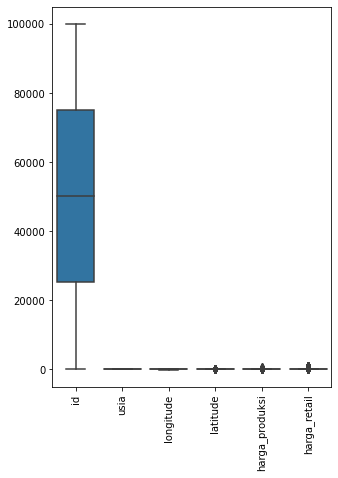

In [11]:
#Membuat boxplot untuk mendeteksi outlier
plt.figure(figsize=(5,7))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [12]:
#Menghilangkan data outlier

for x in ['harga_produksi']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan
    
for x in ['harga_retail']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [13]:
#Melihat hasil statistik deskriptif setelah data outlier di hilangkan
df.describe()

,id,usia,longitude,latitude,harga_produksi,harga_retail
count,41751.000000,41751.000000,41751.000000,41751.000000,38526.000000,37942.000000
mean,50091.456181,41.560322,25.717402,28.350523,22.099649,44.132150
std,28797.518510,16.717251,89.756045,22.130271,14.800685,28.940065
min,5.000000,13.000000,-158.164931,-43.253132,0.008300,0.020000
25%,25295.000000,27.000000,-49.509436,26.180786,10.890000,22.950001
50%,50156.000000,42.000000,5.133181,35.283936,18.337500,36.950001
75%,75117.000000,56.000000,116.407585,40.718087,29.868649,59.500000
max,99996.000000,70.000000,153.514393,64.865194,69.005211,136.500000


<function matplotlib.pyplot.show(close=None, block=None)>

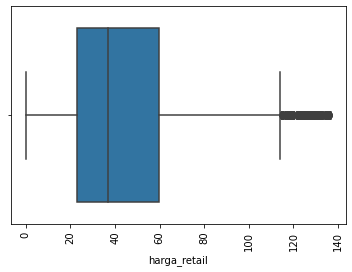

In [14]:
sns.boxplot(x=df['harga_retail'])
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

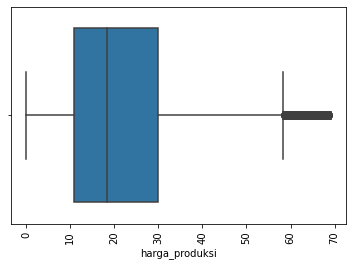

In [15]:
sns.boxplot(x=df['harga_produksi'])
plt.xticks(rotation=90)
plt.show

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

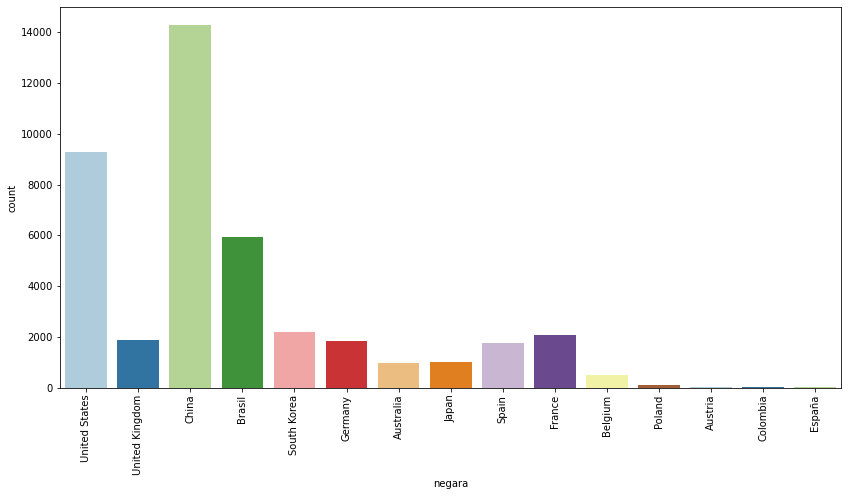

In [16]:
#Membuat counplot untuk melihat jumlah customer berdasarkan negara
plt.figure(figsize = (14,7))
sns.countplot(df["negara"],palette = "Paired")
plt.xticks (rotation=90)
plt.show

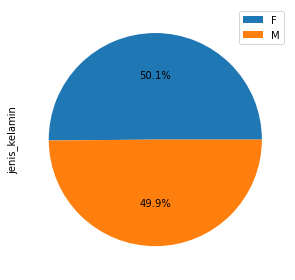

In [17]:
#Melihat jumlah customer berdasarkan jenis kelamin 
df['jenis_kelamin'].value_counts().plot.pie(autopct='%1.1f%%',labels=None,legend=True)
plt.tight_layout()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

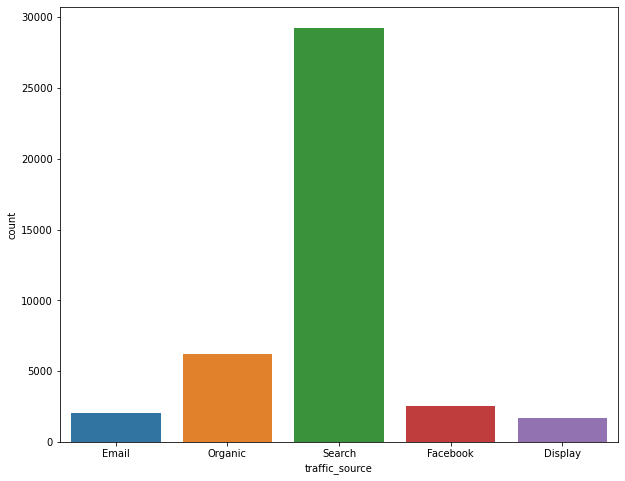

In [18]:
#Melihat jumlah customer yang menggunakan traffic source
plt.figure(figsize = (10,8))
sns.countplot(df["traffic_source"])
plt.show

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

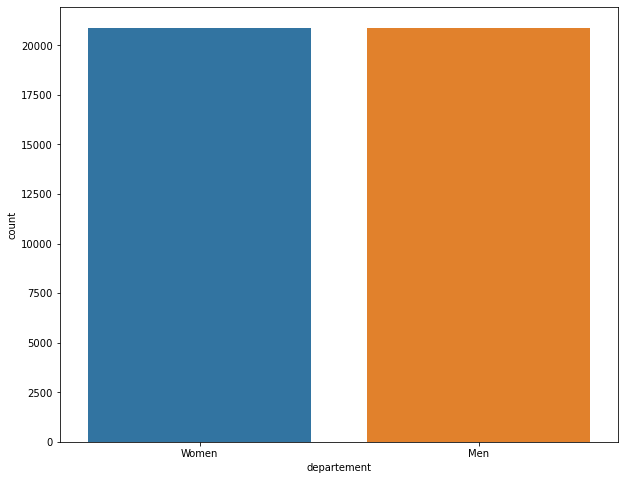

In [19]:
#Melihat perbandingan per departemen 
plt.figure(figsize = (10,8))
sns.countplot(df["departement"])
plt.show

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

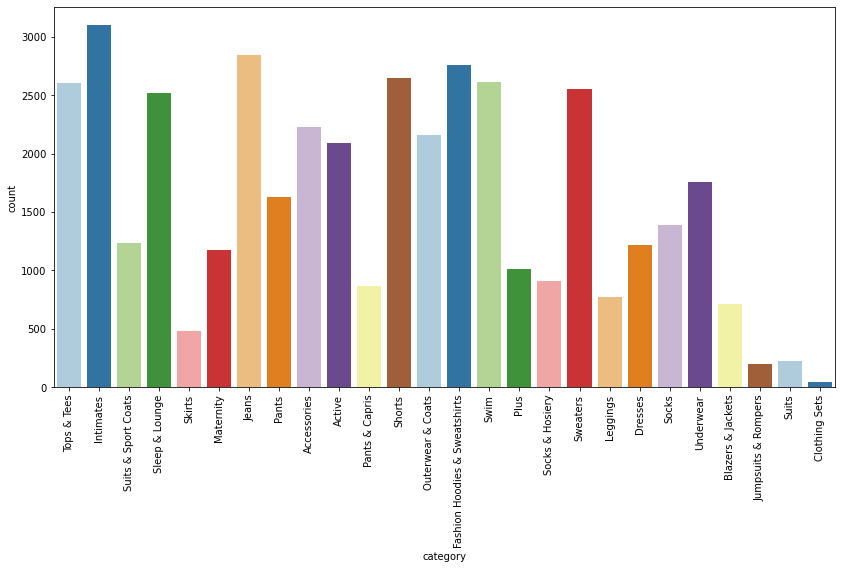

In [21]:
#Melihat category barang unggulan yang paling banyak terjual
plt.figure(figsize = (14,7))
sns.countplot(df["category"],palette = "Paired")
plt.xticks (rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

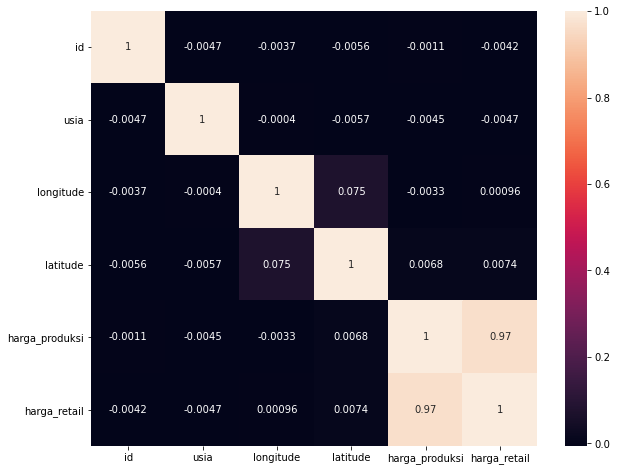

In [54]:
#Melihat korelasi tiap data
plt.figure(figsize = (10,8))
sns.heatmap(df.corr() ,annot= True)
plt.show

In [55]:
#Melakukan drop column yang tidak digunakan
X = df.drop(["tanggal","id","nama","usia","kota","brand","kategori_usia","longitude","latitude","state"], axis = 1)

In [24]:
#Melakukan standarisasi
#Tujuan pemodelan menggunakan clustering ialah untuk membuat customer segmentation

encoder = OneHotEncoder()
encoder.fit(X.select_dtypes(include="object"))
X_onehot = pd.DataFrame(encoder.transform(X.select_dtypes(include="object")).toarray(),columns=encoder.get_feature_names_out())
X_onehot

X_preprocessed = pd.concat([X.select_dtypes(exclude="object"), X_onehot],axis=1)
X_preprocessed

scaler = StandardScaler()
scaler.fit(X_preprocessed)
X_scaled = pd.DataFrame(scaler.transform(X_preprocessed),columns=X_preprocessed.columns)
X_scaled.head()

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,...,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women
0,-1.213412,-1.279978,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,3.874122,-0.209785,-1.000982,1.000982
1,-1.073995,-1.110315,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
2,NaN,NaN,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,5.732479,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018
3,-0.174565,-0.350113,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,1.386916,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
4,0.597301,0.271871,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982


In [25]:
X_scaled = pd.DataFrame (X_scaled)
X_scaled

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,...,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women
0,-1.213412,-1.279978,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,3.874122,-0.209785,-1.000982,1.000982
1,-1.073995,-1.110315,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
2,NaN,NaN,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,5.732479,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018
3,-0.174565,-0.350113,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,1.386916,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
4,0.597301,0.271871,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42823,-0.737366,-0.488677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42824,0.688882,0.485764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42825,-1.065481,-1.006651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42826,-1.129939,-1.162146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
#Melakukan drop column yang berisi NaN
X_scaled.dropna(inplace = True)
X_scaled

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,...,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women
0,-1.213412,-1.279978,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,3.874122,-0.209785,-1.000982,1.000982
1,-1.073995,-1.110315,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
3,-0.174565,-0.350113,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,1.386916,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
4,0.597301,0.271871,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
5,-0.733060,-0.661104,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41744,1.080393,0.721081,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982
41745,0.276688,0.202416,0.997297,-0.997297,6.511544,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018
41747,-0.663385,-0.765805,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018
41748,1.494569,2.276039,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.185578,-0.149102,-0.072948,5.732479,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018


In [27]:
#Membuat pemodelan berdasarkan 2 cluster 
K = 2
kmeans_2 = KMeans(n_clusters = K, random_state = 20)

start = time()
kmeans_2.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.512s


In [28]:
#Membuat pemodelan berdasarkan 3 cluster
K = 3
kmeans_3 = KMeans(n_clusters=K, random_state = 20)

start = time()
kmeans_3.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.802s


In [29]:
#Membuat pemodelan berdasarkan 4 cluster

K = 4
kmeans_4 = KMeans(n_clusters=K, random_state = 20)

start = time()
kmeans_4.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 1.762s


In [30]:
#Membuat pemodelan berdasarkan 5 cluster

K = 5
kmeans_5 = KMeans(n_clusters=K, random_state = 20)

start = time()
kmeans_5.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.844s


In [31]:
#Membuat pemodelan berdasarkan 6 cluster

K = 6
kmeans_6 = KMeans(n_clusters=K, random_state = 20)

start = time()
kmeans_6.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.924s


In [32]:
#Membuat pemodelan berdasarkan 10 cluster

K = 10
mb_kmeans_10 = MiniBatchKMeans(n_clusters=K)

start = time()
mb_kmeans_10.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.184s


In [33]:
#Membuat pemodelan berdasarkan 15 cluster

K = 15
mb_kmeans_15 = MiniBatchKMeans(n_clusters=K)

start = time()
mb_kmeans_15.fit(X_scaled)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.127s


In [34]:
cluster = X_scaled.assign(
    clusters_of_2 = kmeans_2.predict(X_scaled),
    clusters_of_3 = kmeans_3.predict(X_scaled),
    clusters_of_4 = kmeans_4.predict(X_scaled),
    clusters_of_5 = kmeans_5.predict(X_scaled),
    clusters_of_6 = kmeans_6.predict(X_scaled)
)

with pd.option_context("display.max_columns", None):
    display(cluster.head())

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,negara_España,negara_France,negara_Germany,negara_Japan,negara_Poland,negara_South Korea,negara_Spain,negara_United Kingdom,negara_United States,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search,category_Accessories,category_Active,category_Blazers & Jackets,category_Clothing Sets,category_Dresses,category_Fashion Hoodies & Sweatshirts,category_Intimates,category_Jeans,category_Jumpsuits & Rompers,category_Leggings,category_Maternity,category_Outerwear & Coats,category_Pants,category_Pants & Capris,category_Plus,category_Shorts,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women,clusters_of_2,clusters_of_3,clusters_of_4,clusters_of_5,clusters_of_6
0,-1.213412,-1.279978,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,1.871996,-0.204567,4.388353,-0.254835,-0.417807,-1.530693,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,-0.253232,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,3.874122,-0.209785,-1.000982,1.000982,0,0,1,4,1
1,-1.073995,-1.110315,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,1.871996,-0.204567,4.388353,-0.254835,-0.417807,-1.530693,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,3.530400,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,-0.253232,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0,0,1,4,1
3,-0.174565,-0.350113,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,1.386916,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,-0.534189,-0.204567,-0.227876,-0.254835,-0.417807,0.653299,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,3.948949,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0,0,1,1,4
4,0.597301,0.271871,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,-0.534189,-0.204567,-0.227876,-0.254835,-0.417807,0.653299,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,3.948949,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0,0,1,1,4
5,-0.733060,-0.661104,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,1.871996,-0.204567,-0.227876,-0.254835,-0.417807,0.653299,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,9.292211,-0.253232,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0,0,3,1,4


<AxesSubplot:>

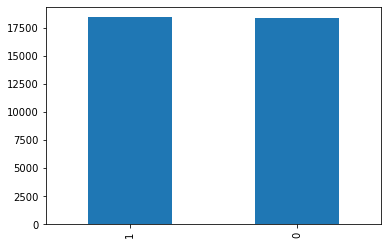

In [35]:
#Visualisasi cluster K = 2

cluster["clusters_of_2"].value_counts().plot(kind = "bar")

<AxesSubplot:>

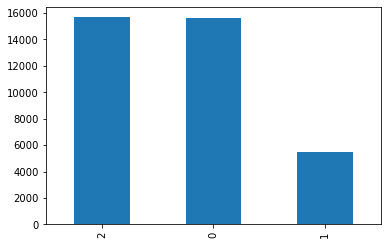

In [36]:
#Visualisasi cluster K = 3

cluster["clusters_of_3"].value_counts().plot(kind = "bar")

<AxesSubplot:>

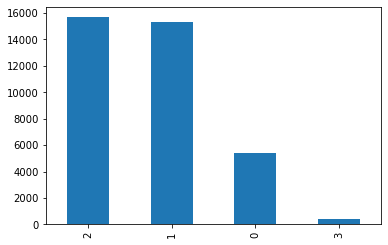

In [37]:
#Visualisasi cluster K = 4

cluster["clusters_of_4"].value_counts().plot(kind = "bar")

<AxesSubplot:>

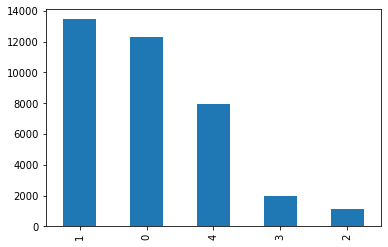

In [38]:
#Visualisasi cluster K = 5

cluster["clusters_of_5"].value_counts().plot(kind = "bar")

<AxesSubplot:>

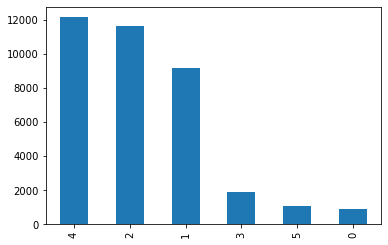

In [39]:
#Visualisasi cluster K = 6

cluster["clusters_of_6"].value_counts().plot(kind = "bar")

##  Cluster Magnitude

Model Evaluation menggunakan Cluster Magnitude

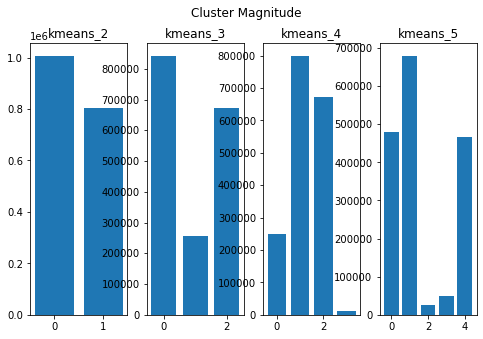

In [40]:
fig, axis = plt.subplots(1, 4, figsize=(8, 5))
for ax, model, name in zip(axis,[kmeans_2, kmeans_3, kmeans_4, kmeans_5],["kmeans_2", "kmeans_3", "kmeans_4", "kmeans_5"]):
    distances = model.transform(X_scaled)
    preds = model.predict(X_scaled)
    inertia_per_cluster = np.array([sum(dist[c]**2 for dist, c in zip(distances, preds) if c == cluster)
        for cluster in range(model.n_clusters)])
    ax.bar(x=range(model.n_clusters), height=inertia_per_cluster)
    ax.set_title(name)
plt.suptitle("Cluster Magnitude")
plt.show()

## Elbow Method

Model Evaluation menggunakan Elbow Method

In [64]:
# sum of squared distances
ssd = []

for k in range(1, 10):
    model = KMeans(n_clusters=k, random_state=20)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.213s
Clustering with n_clusters=2
Done clustering in 0.231s
Clustering with n_clusters=3
Done clustering in 0.324s
Clustering with n_clusters=4
Done clustering in 0.542s
Clustering with n_clusters=5
Done clustering in 0.502s
Clustering with n_clusters=6
Done clustering in 0.689s
Clustering with n_clusters=7
Done clustering in 0.706s
Clustering with n_clusters=8
Done clustering in 0.734s
Clustering with n_clusters=9
Done clustering in 0.727s


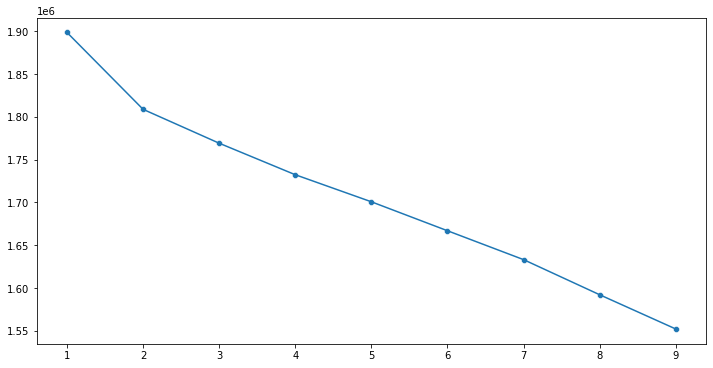

In [65]:
#Visualisasi dari penerapan model evaluation Elbow Method

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 10), y=ssd)
sns.scatterplot(x=range(1, 10), y=ssd)
plt.xticks(range(1, 10))
plt.show()

## Silhouette Coefficient

Model Evaluation menggunakan Silhouette Coefficient

In [66]:
silhouette_scores = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=20)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(X_scaled)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(X_scaled, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.227s
Calculating silhouette coefficient..
Done calculating in 30.352s
Clustering with n_clusters=3
Done clustering in 0.342s
Calculating silhouette coefficient..
Done calculating in 32.329s
Clustering with n_clusters=4
Done clustering in 0.944s
Calculating silhouette coefficient..
Done calculating in 23.666s
Clustering with n_clusters=5
Done clustering in 0.604s
Calculating silhouette coefficient..
Done calculating in 27.863s
Clustering with n_clusters=6
Done clustering in 0.578s
Calculating silhouette coefficient..
Done calculating in 20.627s
Clustering with n_clusters=7
Done clustering in 0.761s
Calculating silhouette coefficient..
Done calculating in 24.093s
Clustering with n_clusters=8
Done clustering in 0.925s
Calculating silhouette coefficient..
Done calculating in 26.726s
Clustering with n_clusters=9
Done clustering in 0.821s
Calculating silhouette coefficient..
Done calculating in 28.192s
Clustering with n_clusters=10
Done clust

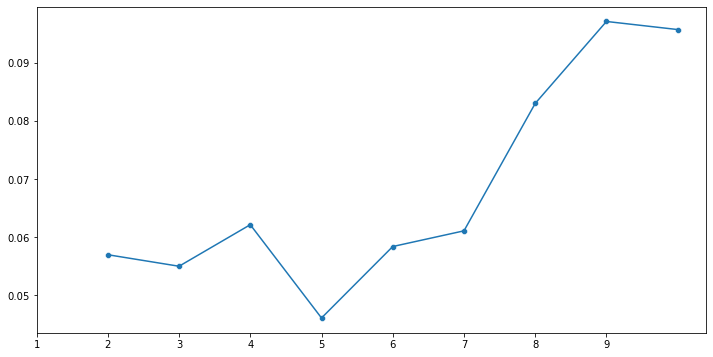

In [67]:
#Visualisasi dari penerapan model evaluation Silhouette Coefficient

plt.figure(figsize=(12, 6))
sns.lineplot(x=range(2, 11), y=silhouette_scores)
sns.scatterplot(x=range(2, 11), y=silhouette_scores)
plt.xticks(range(1, 10))
plt.show()

In [57]:
#Menggunakan cluster 3 dalam pemodelan untuk membuat customer segmentation

K = 3
kmeans_3 = KMeans(n_clusters=K, random_state = 20)

start = time ()
kmeans_3.fit(X_scaled)
label = kmeans_3.predict (X_scaled)


In [58]:
#Menggabungkan cluster dengan data

clustering = X_scaled.assign(Cluster = kmeans_3.predict(X_scaled))
with pd.option_context("display.max_columns", None):
    display(clustering.head())

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,negara_España,negara_France,negara_Germany,negara_Japan,negara_Poland,negara_South Korea,negara_Spain,negara_United Kingdom,negara_United States,traffic_source_Display,traffic_source_Email,traffic_source_Facebook,traffic_source_Organic,traffic_source_Search,category_Accessories,category_Active,category_Blazers & Jackets,category_Clothing Sets,category_Dresses,category_Fashion Hoodies & Sweatshirts,category_Intimates,category_Jeans,category_Jumpsuits & Rompers,category_Leggings,category_Maternity,category_Outerwear & Coats,category_Pants,category_Pants & Capris,category_Plus,category_Shorts,category_Skirts,category_Sleep & Lounge,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women,Cluster
0,-1.213412,-1.279978,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,1.871996,-0.204567,4.388353,-0.254835,-0.417807,-1.530693,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,-0.253232,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,3.874122,-0.209785,-1.000982,1.000982,0
1,-1.073995,-1.110315,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,1.871996,-0.204567,4.388353,-0.254835,-0.417807,-1.530693,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,3.530400,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,-0.253232,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
3,-0.174565,-0.350113,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,1.386916,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,-0.534189,-0.204567,-0.227876,-0.254835,-0.417807,0.653299,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,3.948949,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
4,0.597301,0.271871,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,-0.534189,-0.204567,-0.227876,-0.254835,-0.417807,0.653299,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,-0.107617,3.948949,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
5,-0.733060,-0.661104,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,-0.006921,-0.227352,-0.214776,-0.157371,-0.048505,-0.236018,-0.20835,-0.216297,1.871996,-0.204567,-0.227876,-0.254835,-0.417807,0.653299,-0.237203,-0.229442,-0.131717,-0.034278,-0.173421,-0.265797,-0.283254,-0.270518,-0.069726,-0.136983,-0.170245,-0.233633,-0.20169,-0.145624,-0.15785,-0.26028,9.292211,-0.253232,-0.185578,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0


In [59]:
clustering

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,...,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women,Cluster
0,-1.213412,-1.279978,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,3.874122,-0.209785,-1.000982,1.000982,0
1,-1.073995,-1.110315,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
3,-0.174565,-0.350113,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,-0.406353,1.386916,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
4,0.597301,0.271871,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
5,-0.733060,-0.661104,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41744,1.080393,0.721081,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,-1.000982,1.000982,0
41745,0.276688,0.202416,0.997297,-0.997297,6.511544,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018,2
41747,-0.663385,-0.765805,-1.002710,1.002710,-0.153573,-0.010944,-0.109872,-0.406353,-0.721024,-0.016234,...,-0.149102,-0.072948,-0.174445,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018,2
41748,1.494569,2.276039,0.997297,-0.997297,-0.153573,-0.010944,-0.109872,2.460916,-0.721024,-0.016234,...,-0.149102,-0.072948,5.732479,-0.255314,-0.258545,-0.258123,-0.209785,0.999018,-0.999018,2


In [60]:
#Menghitung data yang ada di setiap cluster
pd.DataFrame(clustering['Cluster']).value_counts()

Cluster
2          15674
0          15655
1           5461
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

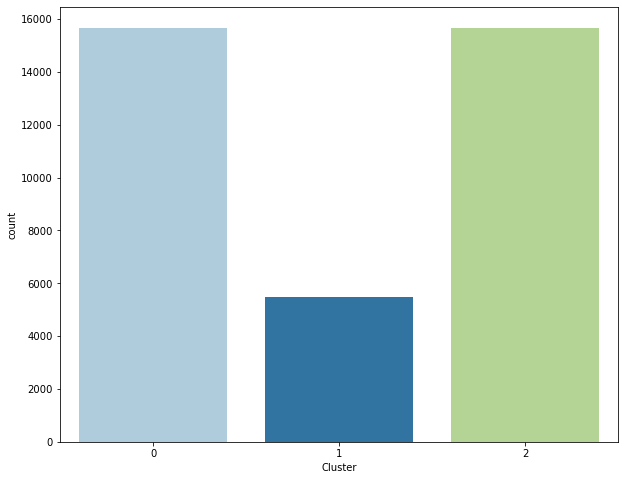

In [61]:
#Visualisasi dari tiap cluster berdasarkan jumlahnya menggunakan bar chart

plt.figure(figsize = (10,8))
sns.countplot(clustering["Cluster"],palette = "Paired")
plt.show

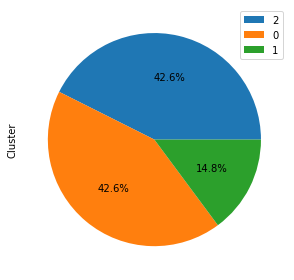

In [62]:
#Visualisasi dari tiap cluster berdasarkan jumlahnya menggunakan pie chart

clustering['Cluster'].value_counts().plot.pie(autopct='%1.1f%%',labels=None,legend=True)
plt.tight_layout()


In [63]:
data_clustering = clustering.groupby(['Cluster']).mean()
data_clustering

,harga_produksi,harga_retail,jenis_kelamin_F,jenis_kelamin_M,negara_Australia,negara_Austria,negara_Belgium,negara_Brasil,negara_China,negara_Colombia,...,category_Socks,category_Socks & Hosiery,category_Suits,category_Suits & Sport Coats,category_Sweaters,category_Swim,category_Tops & Tees,category_Underwear,departement_Men,departement_Women
Cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.056506,-0.016775,0.001190,-0.001190,-0.000729,-0.005107,0.007808,-0.009459,0.002987,-0.004426,...,-0.185578,0.152199,0.065261,-0.174445,-0.066632,-0.022641,-0.056988,-0.209785,-1.000982,1.000982
1,-0.053590,-0.009282,-0.014609,0.014609,0.001429,-0.010944,0.014948,0.001082,-0.013102,0.028898,...,-0.005931,0.005316,0.012854,0.008355,-0.005495,-0.015241,-0.010688,-0.003834,0.000300,-0.000300
2,-0.055117,-0.014407,0.004184,-0.004184,-0.002615,0.012377,-0.005264,0.005792,0.000226,-0.000509,...,0.183922,-0.149102,-0.072948,0.177544,0.062502,0.027356,0.065096,0.212495,0.999018,-0.999018
